# <center> INTRODUCTION À PYTHON POUR L'ÉCONOMIE APPLIQUÉE</center>
## <center> COURS 0 : </center>
## <center> QUELQUES EXEMPLES INTRODUCTIFS </center>
#### <center>Michal Urdanivia (UGA)</center>
#### <center> michal.wong-urdanivia@univ-grenoble-alpes.fr </center>

### <center> PRÉSENTATION </center>

Dans cette introduction nous allons donner un très court aperçu des possibilités d'utilisation du langage Python pour l'économiste. Pour cela:
- nous allons présenter des exemples de simulation de modèles simples de l'économie,
- des exemples du travail empirique pouvant être fait.

**Résumé:** Un notebook Jupyter est un document composé de **cellules** qui contiennent:
- Le code de programmation qui dans notre cas sera du code Python.
- Du texte dont du texte mathématiques écrit dans le "style" de LaTex. Ces cellules sont des cellules *markdown*.
- Des résultats issus de l'execution du code programmé.

Ainsi, ceci est une cellule avec du texte et plus précisément cellule *markdown*.

On peut y écrire sous forme de listes:

1. **Première** entrée.
2. *Deuxième* entrée.
3. ~~Troisième~~ item entrée barrée.

On peut écrire de maths, e.g. $\alpha^2$ ou

$$
X = \int_0^{\infty} \frac{x}{x+1} \mathrm{d}x
$$

In [1]:
# Ceci est une cellule de code
x = 10   # Ce qui est écrit après un "#" est du "commentaire" du code, il n'est donc pas exécuté

# Procédons à des calculs
a = 20
b = 30
c = a + b

# Affichons les résultats (au-dessous de cette cellule)
print(c)

50


On peut comme ici écrire un peu plus de texte(cellule *markdown*) et poursuivre les calculs(cellules de code).

In [ ]:
d = c * 2
print(d)
print(c)

**Remarque:** 

Bien que JupyterLab/Jupyter s'execute avec un serveur, cela se fait sans besoin de connexion web (le chemin étant quelque chose comme *localhost:8888/lab*).<br>

**Binder:** Une exception est d'utiliser [binder](https://mybinder.org), dans ce cas JupyterLab s'executera sur un cloud.

### <center> PROBLÉME CLASSIQUE DU CONSOMMATEUR </center>

On considère ici l'exemple classique des manuels de cours de Microéconomie que vous avez vu dans vos études.

Le problème est le suivant:

$$
\begin{align*}
V(p_{1},p_{2},R) & = \max_{q_{1},q_{2}} q_{1}^{\alpha}q_{2}^{1-\alpha}\\
 & \text{s.c.}\\
p_{1}q_{1}+p_{2}q_{2} & \leq R, \quad p_{1}, p_{2}, R > 0, \quad q_{1},q_{2}  \geq 0
\end{align*}
$$

On peut résoudre ce problème **numériquement**.

1. Choix de **paramètres**:

In [2]:
alpha = 0.5
R = 10
p1 = 1
p2 = 2

2. La **fonction objectif** du consommateur est:

In [3]:
# On définit la fonction objectif.
def val_cons(q1, alpha, R, p1, p2): 
    
    # a. Tout le revenu n'est pas dépensé sur le premier bien
    #    Et ce qui est dépensé dans le deuxième est:
    q2 = (R - p1*q1) / p2 
    
    # b. L'utilité obtenue est:
    util = q1**alpha*q2**(1-alpha)
    
    return util # résultat produit par la fonction

3. On utilise une fonction du module *scipy* pour **résoudre le problème**.

In [4]:
# a. On importe à partir du module scipy la fonction optimize
from scipy import optimize

# b. la valeur du choix comme seulement fonction de q1
obj = lambda q1: -val_cons(q1, alpha, R, p1, p2)

# c. on appelle la fonction minimisatrice
solution = optimize.minimize_scalar(obj, bounds=(0, R/p1))

# d. affichage des résultats
q1 = solution.x
q2 = (R - q1*p1) / p2
print(q1, q2)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
4.999999999999999 2.5000000000000004


**Tâche**: résoudre le même problème avec la fonction d'utilité CES.

$$
u(q_1,q_2) = (\alpha q_1^{-\beta} + (1-\alpha)q_2^{-\beta})^{-1/\beta}
$$

In [5]:
# a. choix des paramètres
alpha = 0.5
beta = 0.000001
R = 10
p1 = 1
p2 = 2

# b. valeur du choix
def val_cons_ces(q1, alpha, beta, R, p1, p2):
    q2 = (R - p1*q1)/p2
    if q1 > 0 and q2 > 0:
        util = (alpha*q1**(-beta) + (1 - alpha)*q2**(-beta))**(-1 / beta) 
    else:
        util = 0
    return util

# c. objectif
obj = lambda q1: -val_cons_ces(q1, alpha, beta, R, p1, p2)

# d. solution
solution = optimize.minimize_scalar(obj, bounds=(0, R/p1))

# e. résultat
q1 = solution.x
q2 = (R - q1 * p1)/p2
print(q1, q2)

4.99995818905239 2.500020905473805


### <center> SIMULATION DU MODÈLE AS-AD </center>

**Remarque**: c'est un modèle macroéconomique pour [l'offre et la demande globales dans une économie](https://en.wikipedia.org/wiki/AD%E2%80%93AS_model).

Soit le modèle défini par:

$$
\begin{align*}
\hat{y}_{t} &= b\hat{y}_{t - 1}+\beta(z_{t} - z_{t-1}) -a\beta s_{t} + a\beta\phi s_{t-1} \\
\hat{\pi}_{t} &= b\hat{\pi}_{t - 1}+\beta\gamma z_{t} - \beta\phi\gamma z_{t}+\beta s_{t} - \beta\phi s_{t-1} \\
z_{t} &= \delta z_{t - 1}+x_{t}, x_{t} \sim N(0, \sigma_x^2) \\
s_{t} &= \omega s_{t - 1}+c_{t}, c_{t} \sim N(0, \sigma_c^2) \\
b &= \frac{1 + a\phi\gamma}{1 + a\gamma} \\
\beta &= \frac{1}{1 + a\gamma}
\end{align*}
$$

où $\hat{y}_{t}$ est l'écart de production, $\hat{\pi}_{t}$ est l'écart d'inflation, $z_{t}$ est un choc de demande AR(1), et $\hat{s}_{t}$ est un choc d'offre AR(1).

1. Choix de **paramètres**:

In [7]:
a = 0.4
gamma = 0.1
phi = 0.9
delta = 0.8
omega = 0.15
sigma_x = 1
sigma_c = 0.4
T = 100

2. Calcul des **paramètres composites**:

In [8]:
b = (1 + a*phi*gamma)/(1 + a*gamma)
beta = 1/(1 + a*gamma) 

3. Définition des **fonctions du modèle**:

In [9]:
y_hat_func = lambda y_hat_lag, z,z_lag, s, s_lag: b*y_hat_lag + beta*(z-z_lag) - a*beta*s + a*beta*phi*s_lag
pi_hat_func = lambda pi_lag,z,z_lag,s,s_lag: b*pi_lag + beta*gamma*z - beta*phi*gamma*z_lag + beta*s - beta*phi*s_lag
z_func = lambda z_lag,x: delta*z_lag + x
s_func = lambda s_lag,c: omega*s_lag + c

4. On execute la **simulation**:

In [10]:
import numpy as np # importation du module numpy

# a. mise en place du générateur de nombre aléatoires
np.random.seed(2015)   

# b. affectation des données simulées
x = np.random.normal(loc=0, scale=sigma_x, size=T)
c = np.random.normal(loc=0, scale=sigma_c, size=T)
z = np.zeros(T)
s = np.zeros(T)
y_hat = np.zeros(T)
pi_hat = np.zeros(T)

# c. execution de la simulation
for t in range(1,T):

    # i. actualisation de z et s
    z[t] = z_func(z[t-1], x[t])
    s[t] = s_func(s[t-1], c[t])

    # ii. calcul de y og pi 
    y_hat[t] = y_hat_func(y_hat[t-1], z[t], z[t-1], s[t], s[t-1])
    pi_hat[t] = pi_hat_func(pi_hat[t-1], z[t], z[t-1], s[t], s[t-1])

5. **Visualisation** de la simulation:

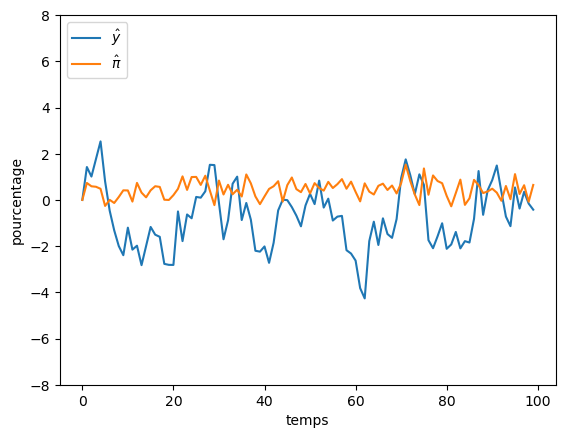

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(y_hat, label='$\\hat{y}$')
ax.plot(pi_hat, label='$\\hat{\pi}$')

ax.set_xlabel('temps')

ax.set_ylabel('pourcentage')
ax.set_ylim([-8,8])

ax.legend(loc='upper left');

On peut aussi utiliser **le style seaborn**:

/var/folders/76/5jlfdvy15495cn_xhrlprt280000gn/T/ipykernel_26510/626415962.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


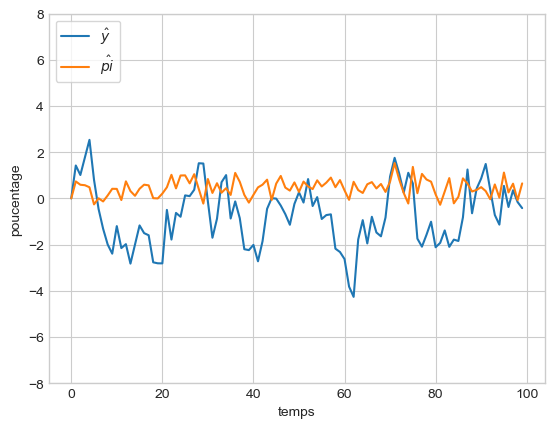

In [12]:
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(y_hat,label='$\\hat{y}$')
ax.plot(pi_hat,label='$\\hat{pi}$')

ax.set_xlabel('temps')

ax.set_ylabel('poucentage')
ax.set_ylim([-8,8])

ax.legend(loc='upper left',facecolor='white',frameon='True');

### <center> MODULES</center>

Un **module** est un fichier **.py**-file avec des fonctions qu'on importe et auxquelle on peut alors faire appel dans le notebook.

Vous pouvez ouvrir **monmodule.py** et y jeter un oeil.

In [ ]:
import monmodule

In [ ]:
x = 5
y = monmodule.mafonction(x)
print(y)

### <center> ANALYSE BASIQUE DE DONNÉES</center>

### Données d'application 

Nous allons utiliser des données qui sont disponible sur le site que [Bruce Hansen](https://www.ssc.wisc.edu/~bhansen/) dédie à son cours d'[économétrie](https://www.ssc.wisc.edu/~bhansen/econometrics/). Plus précisément, nous allons utiliser des données extraites du **Current Population Survey**(CPS) de 2009. Une description du fichier est [ici](https://www.ssc.wisc.edu/~bhansen/econometrics/cps09mar_description.pdf)



#### Lecture des données

Pour travailler(e.g., lire/charger les données, sélectionner des variables, etc) sur les données nous allons utiliser la bibliothèque [pandas](https://fr.wikipedia.org/wiki/Pandas) dont vous n'avez pas besoin de lire toute la documentation pour l'utiliser(quelqu'un a t-il déjà lu les quelques 3000 pages correspondantes à la doc en pdf? ou au moins 50 %?)

In [13]:
# Imports

import pandas as pd   
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model

In [14]:
# Lecture des données.
# On utilise la fonction "read_stata" dans pandas pour lire le fichier au format stata(".dta") disponible 
# sur le site de Bruce Hansen. Vous pouvez aussi le télécharger sur votre poste et ensuite le lire.
# Nous l'appellons cps_df(pour cps data frame)

cps_df = pd.read_stata("https://www.ssc.wisc.edu/~bhansen/econometrics/cps09mar.dta")
cps_df.info()   # Affichage d'informations.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50742 entries, 0 to 50741
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        50742 non-null  float64
 1   female     50742 non-null  float64
 2   hisp       50742 non-null  float64
 3   education  50742 non-null  float64
 4   earnings   50742 non-null  float64
 5   hours      50742 non-null  float64
 6   week       50742 non-null  float64
 7   union      50742 non-null  float64
 8   uncov      50742 non-null  float64
 9   region     50742 non-null  float64
 10  race       50742 non-null  float64
 11  marital    50742 non-null  float64
dtypes: float64(12)
memory usage: 4.6 MB


In [ ]:
# Affichage des premières lignes(5 par défaut) et de statistiques descriptives de base(moyennes, écart-types, etc)
print(cps_df.head())
cps_df.describe()

#### Calcul de l'estimateur des MCO

Le modèle que nous allons estimer suppose que,

$$
\begin{align*}
Y &= X^\top \beta + U, \tag{1}
\end{align*}
$$

où $ Y\in \mathbb{R} $, $ X\in\mathbb{R}^K $, $ U\in \mathbb{R} $, sont de variables aléatoires: $ Y $ est la variables dépendante, 
$ X $ sont $ K $ régresseurs, $ U $ est l'erreur du modèle. $ Y $ et $ X $ sont observables tandis que $ U $ représente tout ce qui peut faire 
varier $ Y $ pour des valeurs données de $ X $. $ \beta \in \mathbb{R}^K $ sont les paramètres inconnus du modèle qu'on se propose d'estimer car
ils permettent de mesurer la relation entre les éléments de $ X $ et $ Y $ sans pour autant que cette relation si elle existe puisse avoir une 
interprétation causale ou en termers de modèle de régression. 

En effet ici on se contente de calculer l'estimateur des MCO défini sur des données sur (Y, X) $, $ \{(Y_i, X_i)\}_{i=1}^n $,

$$
\begin{align*}
\hat{\beta}_n^{MCO} &=  \arg\min_{b\in \mathbb{R}^K} n^{-1}\sum_{i=1}^n(Y_i - X_i^\top b)^2 \tag{2}
\end{align*}
$$

On peut alors calculer $ \hat{\beta}_n^{MCO} $ dès lors que $ n^{-1}\sum_{i=1}^n X_iX_i^\top $ est de plein rang ce qui revient à l'absence d
multicolinéarité entre régrésseurs dans l'échantillon. On obtient alors,

$$
\begin{align*}
\hat{\beta}_n^{MCO} &= \left( n^{-1}\sum_{i=1}^n X_iX_i^\top \right)^{-1} n^{-1}\sum_{i=1}^n X_iY_i = \left(\mathbf{X}^\top \mathbf{X}\right)^ {-1} \mathbf{X}^\top\mathbf{Y}  \tag{3}
\end{align*}
$$

où:
- $ \mathbf{X} $  est la matrice $ n\times K$ des régrésseurs avec la $i$-ème ligne égale à $ X_i^\top $,
- $ \mathbf{Y} $  est le vecteur $ n\times 1$ de toutes les observations de la variable dépendante de $i$-ème élément égal à $ Y_i^\top $.

On peut se contenter d'une interprétation non causale ni en termes de modèle de régression en supposant $ \operatorname{E}(XU) =0$, auquel cas 
on estime les coefficients de la projection de $Y$ sur $X$ définie par,

$$
\begin{align*}
\beta &=  \arg\min_{b\in \mathbb{R}^K}\operatorname{E}\left((Y_i - X_i^\top b)^2\right) \tag{3}
\end{align*}
$$

#### Calcul matriciel pour l'estimateur des MCO avec numpy

Pour pouvoir utiliser des fonction de numpy pour du calcul matriciel nous avons besoin de définir des objets de type array sur lesquels travaille numpy. Ces objets incluant matrices et vecteurs. 


#### Application.

- Nous allons considérer un modèle où la variable dépendante est un log du salaire, et les régresseurs incluent une constante, le niveau d'études, une mesure de l'expérience potentielle sur le marché du travail en années($ \text{exper} $), son carré($ \text{expersq} $), une indicatrice du sexe($ \text{female} $), et une indicatrice d'être noir($ \text{black} $).  Soit,

  - $ Y $: $ \text{lwage} $(salaire horaire en log),
  - $ X $: $ (1, \text{education}, \text{exper}, \text{expersq}, \text{female}, \text{black})$.

- Parmi ces variables nous devons construire $ \text{lwage} $, $\text{exper}$, $\text{expersq}$, et $\text{black}$.

- Donc la version de (1) qu'on considère est:

$$ 
\begin{align*}
\text{lwage} &= \beta_1 + \beta_2 \text{education} + \beta_3\text{exper} + \beta_4\text{exper}^2  + \beta_5\text{female} + \beta_6\text{black}
+ U
\end{align*}
$$

- Nous allons utiliser un échantillon qui correspond aux personnes qui se définissent comme blanches, ou noires(remarque: la collecte de données américaines permet de recueillir des informations quant à l'appartenance à des groupes ethniques préalablement définis).


In [11]:
# Échantillon

cps_df2 = cps_df[(cps_df.race == 1.0) | (cps_df.race == 2.0)]

# Variables

cps_df2 = cps_df2.assign(exper = cps_df2.age - cps_df2.education - 6) # Expérience
cps_df2 = cps_df2.assign(expersq = cps_df2.exper**2/100) # Expérience au carré
cps_df2 = cps_df2.assign(lwage = np.log(cps_df2.earnings / ( cps_df2.hours * cps_df2.week))) # revenu horaire
cps_df2 = pd.get_dummies(data = cps_df2, columns= ['race']) # indicatrice d'appartenance ethnique
cps_df2 = cps_df2.rename(columns={"race_1.0": "white", "race_2.0": "black"}) # on les renomme 
print(cps_df2.shape)
cps_df2.describe()
#cps_df2[['exper', 'age', 'education', 'expersq', 'lwage', 'earnings', 'week', 'hours']].head()


(46411, 16)


,age,female,hisp,education,earnings,hours,week,union,uncov,region,marital,exper,expersq,lwage,white,black
count,46411.000000,46411.000000,46411.000000,46411.000000,46411.000000,46411.000000,46411.000000,46411.000000,46411.000000,46411.000000,46411.000000,46411.000000,46411.000000,46411.000000,46411.000000,46411.000000
mean,42.213915,0.423477,0.154468,13.882269,55082.729181,43.879964,51.879554,0.021934,0.002262,2.597789,2.754584,22.331646,6.337939,2.945706,0.889358,0.110642
std,11.468616,0.494115,0.361400,2.713667,52324.915589,7.701222,0.596815,0.146471,0.047511,1.047513,2.497897,11.623014,5.635276,0.673137,0.313692,0.313692
min,15.000000,0.000000,0.000000,0.000000,1.000000,36.000000,48.000000,0.000000,0.000000,1.000000,1.000000,-4.000000,0.000000,-7.863267,0.000000,0.000000
25%,33.000000,0.000000,0.000000,12.000000,28000.000000,40.000000,52.000000,0.000000,0.000000,2.000000,1.000000,13.000000,1.690000,2.560096,1.000000,0.000000
50%,42.000000,0.000000,0.000000,13.000000,42000.000000,40.000000,52.000000,0.000000,0.000000,3.000000,1.000000,22.000000,4.840000,2.956512,1.000000,0.000000
75%,51.000000,1.000000,0.000000,16.000000,65000.000000,45.000000,52.000000,0.000000,0.000000,3.000000,5.000000,31.000000,9.610000,3.354542,1.000000,0.000000
max,85.000000,1.000000,1.000000,20.000000,561087.000000,99.000000,52.000000,1.000000,1.000000,4.000000,7.000000,75.000000,56.250000,5.583706,1.000000,1.000000


In [12]:
# Variables(dépendante et régresseurs)

dep_var = cps_df2['lwage']
reg_var = cps_df2[['education', 'female', 'black', 'exper', 'expersq']]

# Ce ne sont pas array mais des objets pour pandas leur type est

print(type(dep_var), type(reg_var))

# Conversion en arrays pour numpy(on crée de nouveaux objets Yn, Xn, afin de ne pas écraser ceux de départ
# que nous utiliserons par la suite.

Y = dep_var.values[:, np.newaxis]
X = reg_var.values
n = len(Y)
# On estime un modèle avec terme constant qu'on doit joindre
X = np.concatenate((np.ones((n,1)), X), axis=1) 
print(type(Y), Y.shape)
print(type(X), X.shape)

# Calcul de l'estimateur

beta_hat=np.linalg.inv(X.T@X) @ (X.T@Y) # "@" pour le produit matriciel ".T" pour la transposé, et "np.linalg.inv" pour l'inverse
print(beta_hat)

<class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'> (46411, 1)
<class 'numpy.ndarray'> (46411, 6)
[[ 1.0207843 ]
 [ 0.11485911]
 [-0.26294147]
 [-0.11038367]
 [ 0.03688886]
 [-0.05834852]]


Nous pourrions poursuivre et calculer à partir des paramètres estimés différentes quantités comme:

- des matrices de variance covariances estimés selon différents scénarios correspondants au traitement de l'hétéroscédasticité,
- des écart-types estimés, des t-statistiques, etc

Mais nous voudrions aussi reproduire ces calculs avec d'autres données et/ou variables et/ou spécifications. Il devient alors indiqué 
de définir des fonctions pour faire cela. 

Nous allons définir des fonction pour calculer les coefficients estimés par MCO en utilisant la formule (9.

**Remarques**: 

- Sur les fonctions regardez par exemple [ici](https://python-programming.quantecon.org/functions.html) .
- Nous allons donner la possibilité à notre fonction de pondérer les observations.



In [13]:
# Fonctions pour estimation par MCO.

# Calcul des coefficients:

def ols_beta_hat(Y, X, addConstant=True,verbose=True, s_wgt = None):

    n  = len(Y)  
    if X.ndim == 1:
        K = 1
        ind_var = X.name
        X = X.values.reshape((n,1))
    else:
        K = X.shape[1]
        ind_var = list(X.columns)  
        X = X.values 

    dep_var = Y.name
    Y = Y.values.reshape((n,1))
    
    if s_wgt is None:
        sw = 1 
        s_wgt_var = 'None'
    else:
        s_wgt_var = s_wgt.name                             
        sw = np.asarray(s_wgt/s_wgt.mean()).reshape((-1,1))

    if addConstant and K==1:
        X = np.concatenate((np.ones((n,1)), X), axis=1) 
        K += 1
        ind_var = ['constant', ind_var]
    elif addConstant and K > 1:
        X = np.concatenate((np.ones((n,1)), X), axis=1) 
        K += 1
        ind_var = ['constant'] + ind_var  
    else:
        ind_var = [ind_var]
    
    XX  = (sw * X).T @ X
    XY  = (sw * X).T @ Y
    beta_hat = np.linalg.solve(XX, XY)

    ehat    = X @ beta_hat
    score_i   = sw * X * (Y - ehat)
    return[beta_hat, ehat, XX, XY, X, Y, n, K, ind_var, dep_var, sw, score_i, s_wgt_var]
    


In [14]:
beta_hat = ols_beta_hat(dep_var, reg_var)
print(beta_hat[0])

[[ 1.0207843 ]
 [ 0.11485911]
 [-0.26294147]
 [-0.11038367]
 [ 0.03688886]
 [-0.05834852]]


#### Calcul avec modules existants

En général pour une tâche donnée, il est recommandé d'utiliser des modules/bibliothèques/fonctions déjà existantes plutôt que de chercher à les reprogrammer de zéro(bien que cet exercice soit très instructif) car ces fonctions on souvent été déjà largement testées, et surtout cela permet 
d'envisage des développements/améliorations sur des bases établies.

Par exemple, pour calculer un estimateur des MCO il existe énormément de modules disponible largement employés par la communauté. Nous allons en considérer deux associés à deux bibliothèques parmi les plus populaires:

- [statsmodels](https://www.statsmodels.org/stable/index.html): orienté statistique au sens général.

- [scikit-learn](https://scikit-learn.org/stable/): davantage apprentissage.

**statsmodels**

Une syntaxe de base est la suivante:

In [15]:
model = sm.OLS(dep_var, sm.add_constant(reg_var))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     3602.
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:40:43   Log-Likelihood:                -39873.
No. Observations:               46411   AIC:                         7.976e+04
Df Residuals:                   46405   BIC:                         7.981e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0208      0.017     60.495      0.0

Plusieurs options sont disponibles, et par exemple pour avoir des écart-types estimés robustes à l'hétéroscédasticité:

In [ ]:
results2 = model.fit(cov_type='HC0')
print(results2.summary())

**Remarques**

- Comme pour le type d'écart-types plusieurs options sous forme d'arguments de la fonction existent. Pour plus de détails vous pouvez 
consulter la [documentation](https://www.statsmodels.org/dev/regression.html) et ou faire des rechercher(sur le web) en fonction de vos besoins.

- L'option HC0 est une parmi d'autres disponibles pour les écart-types robustes à l'hétéroscédasticité, les autres étant 'HC1', 'HC2', 'HC3'. Pour de détails vous pouvez regarder la section 4.13 du [cours en pdf](https://www.ssc.wisc.edu/~bhansen/econometrics/Econometrics.pdf) de Bruce Hansen.

#### Sklearn

Comme indiquée plus haut c'est une bibliothèque très populaire dans la communauté de l'apprentissage et donc pour ce qui concerne les questions de régression surtout concentré sur les problèmes de prédiction et non d'inférence comme ils est traditionnel en économétrie et statistique, et dans les questions économiques où l'on s'intéresse beaucoup à la mesure de relations causales. Néanmoins une litterature très abondante en économétrie théorique adapte et développe des outils initialement développés en apprentissage pour l'économie appliquée.

In [16]:
sklr_model = linear_model.LinearRegression()

# fit the model
sklr_model.fit(reg_var, dep_var)

print(sklr_model.intercept_, sklr_model.coef_)

1.0207842970773302 [ 0.11485911 -0.26294147 -0.11038367  0.03688886 -0.05834852]


In [ ]:
colors = ['#165aa7', '#cb495c', '#fec630', '#bb60d5', '#f47915', '#06ab54', '#002070', '#b27d12', '#007030']

In [ ]:
def var_scatter(df, ax=None, var="education"):
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))
    df.plot.scatter(x=var , y="lwage", alpha=0.35, s=1.5, ax=ax)

    return ax

var_scatter(cps_df2);

In [ ]:
import seaborn as sns
ax = var_scatter(cps_df2)
def scatter_model(mod, X, ax=None, color=colors[1], x="education"):
    if ax is None:
        _, ax = plt.subplots()

    ax.scatter(X[x], mod.predict(X), c=color, alpha=0.25, s=1)
    return ax

scatter_model(sklr_model, reg_var, ax, color=colors[1])
ax.legend(["data", "model"])